# Car Price Prediction


This notebook demonstrates a regression task using a car resale dataset.
We will train a machine learning model to predict the selling price of a used car based on features such as:
- Present Price
- KMs Driven
- Fuel Type
- Transmission Type
- Number of Owners
- Age of the Car

We'll use:
- Scikit-learn for model training, preprocessing, and evaluation
- Random Forest Regressor as our model
- Seaborn and Matplotlib for visualizations



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
df = pd.read_csv("car data.csv")

In [4]:
df['Car_Age'] = 2025 - df['Year']
df = df.drop(['Car_Name', 'Year'], axis=1)  

In [5]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [6]:
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [7]:
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

In [8]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model.fit(X_train, y_train)

c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [11]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

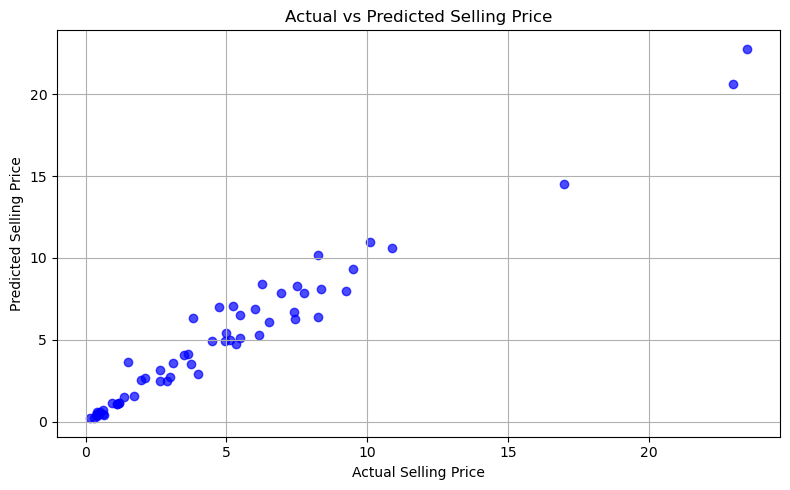

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.96
Mean Absolute Error: 0.64


In [14]:
import seaborn as sns

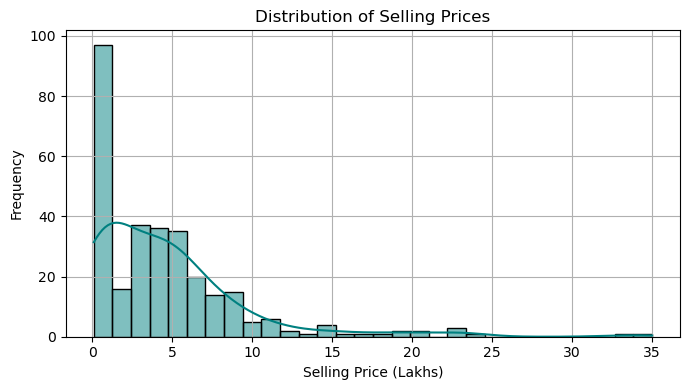

In [15]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='teal')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (Lakhs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


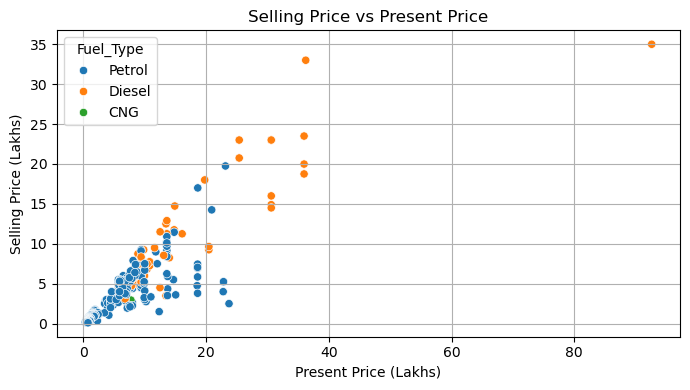

In [16]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', edgecolor='w')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price (Lakhs)')
plt.ylabel('Selling Price (Lakhs)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10412\589865051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', palette='Set2')


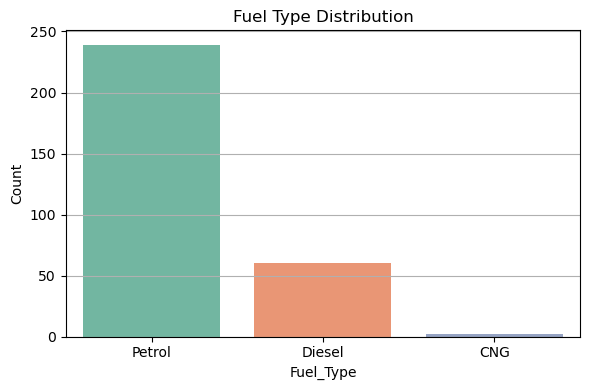

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fuel_Type', palette='Set2')
plt.title('Fuel Type Distribution')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10412\1609592484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


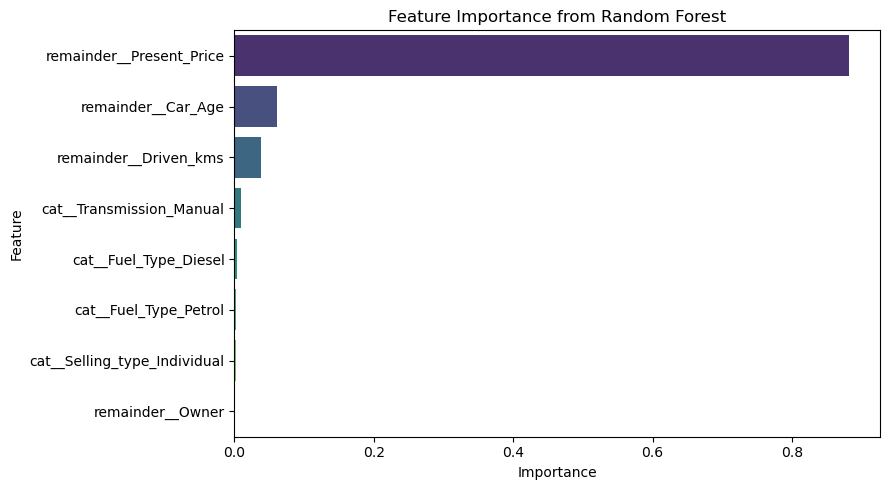

In [19]:
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(9, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()